In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from itertools import combinations, repeat
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
nb_query = 20
query = np.array([i+1 for i in range(nb_query) for x in range(int(np.ceil(np.abs(np.random.normal(0,scale=15))+2)))])
doc_features = np.random.random((len(query), 10))
doc_scores = np.random.randint(5, size=len(query)).astype(np.float32)

In [ ]:
query.shape

(278,)

In [ ]:
doc_scores.shape

(278,)

In [ ]:
doc_features.shape

(278, 10)

In [ ]:
doc_scores.shape

(284,)

In [ ]:
# put data into pairs
xi = []
xj = []
pij = []
pair_id = []
pair_query_id = []
for q in np.unique(query):
    query_idx = np.where(query == q)[0]
    for pair_idx in combinations(query_idx, 2):
        pair_query_id.append(q)
        
        pair_id.append(pair_idx)
        i = pair_idx[0]
        j = pair_idx[1]
        xi.append(doc_features[i])
        xj.append(doc_features[j])
        
        if doc_scores[i] == doc_scores[j]:
            _pij = 0.5
        elif doc_scores[i] > doc_scores[j]:
            _pij = 1
        else: 
            _pij = 0
        pij.append(_pij)
        
xi = np.array(xi)
xj = np.array(xj)
pij = np.array(pij)
pair_query_id = np.array(pair_query_id)

xi_train, xi_test, xj_train, xj_test, pij_train, pij_test, pair_id_train, pair_id_test = train_test_split(
    xi, xj, pij, pair_id, test_size=0.2, stratify=pair_query_id)

In [ ]:
xi.shape

(3289, 10)

In [ ]:
pair_idx_test = np.where(query==query_test)[0]

In [ ]:
list(combinations(pair_idx_test, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

## 1 Queryfying The Stock Picking Problem: A Large Dataset Problem

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  PATH_ = "/content/drive/MyDrive/"
except:
  PATH_ = ""

Mounted at /content/drive


In [3]:
stock_dataset = pd.read_csv(
    PATH_ + "data/config/20220831_last_enhanced_dataset_monthly.csv",
    parse_dates=["Date"]
)

### 1.1 Features

In [4]:
stock_dataset

,Date,symbols,RRET3M,RRET6M,RRET12M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M,EWVOL3M,ISR12M_nexmonth
0,2007-10-31,A,-0.045831,0.010974,0.120625,-0.286889,0.048575,0.377537,-0.043293,0.218709,0.592724,0.252168,0.648748
1,2007-10-31,AA,0.049675,0.139174,0.442392,0.261090,0.517240,1.162594,0.694973,0.873066,1.274447,0.347691,0.747572
2,2007-10-31,AAPL,0.391677,0.891933,1.361976,1.943524,3.129527,3.379097,3.461684,3.534918,2.782748,0.371120,2.032981
3,2007-10-31,ABC,0.027289,-0.055854,0.041181,0.187520,-0.271396,0.141491,0.510378,-0.021059,0.413389,0.266703,0.164794
4,2007-10-31,ABT,0.073018,-0.036949,0.187770,0.665704,-0.238196,0.855951,1.383667,-0.011155,0.947518,0.191821,1.151533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83477,2022-07-29,XRX,-0.007128,-0.137710,-0.257794,-0.031321,-0.427877,-0.566385,0.162517,-0.085528,-0.090846,0.475500,-0.069290
83478,2022-07-29,Y,-0.005002,0.303045,0.271664,-0.343658,14.722666,9.332482,-0.000619,1.505580,0.904912,0.188267,0.910676
83479,2022-07-29,YUM,0.030349,0.032540,-0.043256,0.242966,0.184209,-0.173151,0.597081,0.375240,-0.009783,0.232148,-0.027119
83480,2022-07-29,ZBH,-0.112113,-0.058252,-0.295957,-0.759136,-0.278908,-1.001985,-0.129716,-0.021664,-0.075548,0.281217,-0.073511


In [5]:
stock_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83482 entries, 0 to 83481
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             83482 non-null  datetime64[ns]
 1   symbols          83482 non-null  object        
 2   RRET3M           83482 non-null  float64       
 3   RRET6M           83482 non-null  float64       
 4   RRET12M          83482 non-null  float64       
 5   SRET3M           83482 non-null  float64       
 6   SRET6M           83482 non-null  float64       
 7   SRET12M          83482 non-null  float64       
 8   ISR3M            83482 non-null  float64       
 9   ISR6M            83482 non-null  float64       
 10  ISR12M           83482 non-null  float64       
 11  EWVOL3M          83482 non-null  float64       
 12  ISR12M_nexmonth  83482 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 8.3+ MB


In [ ]:
import datetime as dt

### 1.2 Rebalance Date As a `date_query_id`

In [6]:
stock_dataset["date_query_id"] = stock_dataset["Date"].dt.strftime("%Y%m%d").astype(int)

In [7]:
stock_dataset.head()

,Date,symbols,RRET3M,RRET6M,RRET12M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M,EWVOL3M,ISR12M_nexmonth,date_query_id
0,2007-10-31,A,-0.045831,0.010974,0.120625,-0.286889,0.048575,0.377537,-0.043293,0.218709,0.592724,0.252168,0.648748,20071031
1,2007-10-31,AA,0.049675,0.139174,0.442392,0.261090,0.517240,1.162594,0.694973,0.873066,1.274447,0.347691,0.747572,20071031
2,2007-10-31,AAPL,0.391677,0.891933,1.361976,1.943524,3.129527,3.379097,3.461684,3.534918,2.782748,0.371120,2.032981,20071031
3,2007-10-31,ABC,0.027289,-0.055854,0.041181,0.187520,-0.271396,0.141491,0.510378,-0.021059,0.413389,0.266703,0.164794,20071031
4,2007-10-31,ABT,0.073018,-0.036949,0.187770,0.665704,-0.238196,0.855951,1.383667,-0.011155,0.947518,0.191821,1.151533,20071031


In [8]:
nsymbols_by_date = stock_dataset["symbols"].nunique()
nsymbols_by_date

469

In [10]:
chunkset_size = 4 # 
split_block = chunkset_size*nsymbols_by_date*12
chunk_stock_dataset = stock_dataset[:split_block]

In [11]:
chunk_stock_dataset.shape

(22512, 14)

In [12]:
# custom (train, test). Split before pairing data is required
initial_train_years = 3
split = initial_train_years*nsymbols_by_date*12
train = chunk_stock_dataset[:split]
test = chunk_stock_dataset[split:]

In [13]:
train

,Date,symbols,RRET3M,RRET6M,RRET12M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M,EWVOL3M,ISR12M_nexmonth,date_query_id
0,2007-10-31,A,-0.045831,0.010974,0.120625,-0.286889,0.048575,0.377537,-0.043293,0.218709,0.592724,0.252168,0.648748,20071031
1,2007-10-31,AA,0.049675,0.139174,0.442392,0.261090,0.517240,1.162594,0.694973,0.873066,1.274447,0.347691,0.747572,20071031
2,2007-10-31,AAPL,0.391677,0.891933,1.361976,1.943524,3.129527,3.379097,3.461684,3.534918,2.782748,0.371120,2.032981,20071031
3,2007-10-31,ABC,0.027289,-0.055854,0.041181,0.187520,-0.271396,0.141491,0.510378,-0.021059,0.413389,0.266703,0.164794,20071031
4,2007-10-31,ABT,0.073018,-0.036949,0.187770,0.665704,-0.238196,0.855951,1.383667,-0.011155,0.947518,0.191821,1.151533,20071031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,2010-09-30,XRX,0.303959,0.045439,0.362262,1.724962,0.182339,1.027915,3.189321,0.418874,1.196751,0.366629,1.548755,20100930
16880,2010-09-30,Y,0.026559,0.016299,0.193170,0.275048,0.119357,1.000235,0.638136,0.255998,0.985839,0.204021,0.916309,20100930
16881,2010-09-30,YUM,0.184269,0.187002,0.394750,1.678535,1.204505,1.797914,3.156500,1.476169,1.455018,0.210894,2.044750,20100930
16882,2010-09-30,ZBH,-0.028767,-0.127688,-0.020954,-0.221831,-0.696237,-0.080790,-0.021615,-0.058335,0.109318,0.259777,-0.017404,20100930


In [14]:
train_features = train[['RRET3M', 'RRET6M', 'RRET12M', 'SRET3M', 'SRET6M', 'SRET12M', 'ISR3M', 'ISR6M', 'ISR12M', 'EWVOL3M']]
train_features

,RRET3M,RRET6M,RRET12M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M,EWVOL3M
0,-0.045831,0.010974,0.120625,-0.286889,0.048575,0.377537,-0.043293,0.218709,0.592724,0.252168
1,0.049675,0.139174,0.442392,0.261090,0.517240,1.162594,0.694973,0.873066,1.274447,0.347691
2,0.391677,0.891933,1.361976,1.943524,3.129527,3.379097,3.461684,3.534918,2.782748,0.371120
3,0.027289,-0.055854,0.041181,0.187520,-0.271396,0.141491,0.510378,-0.021059,0.413389,0.266703
4,0.073018,-0.036949,0.187770,0.665704,-0.238196,0.855951,1.383667,-0.011155,0.947518,0.191821
...,...,...,...,...,...,...,...,...,...,...
16879,0.303959,0.045439,0.362262,1.724962,0.182339,1.027915,3.189321,0.418874,1.196751,0.366629
16880,0.026559,0.016299,0.193170,0.275048,0.119357,1.000235,0.638136,0.255998,0.985839,0.204021
16881,0.184269,0.187002,0.394750,1.678535,1.204505,1.797914,3.156500,1.476169,1.455018,0.210894
16882,-0.028767,-0.127688,-0.020954,-0.221831,-0.696237,-0.080790,-0.021615,-0.058335,0.109318,0.259777


### 1.3 Ventile-Based Scoring

In [15]:
scores = pd.read_csv(
    PATH_ + "data/config/20220831_lagged_isharpe_target_monthly.csv",
    parse_dates=["Date"],
    usecols=["Date","symbols","ISC12M"]
)
scores

,Date,symbols,ISC12M
0,2007-09-28,A,11.0
1,2007-09-28,AA,15.0
2,2007-09-28,AAPL,19.0
3,2007-09-28,ABC,9.0
4,2007-09-28,ABT,13.0
...,...,...,...
83946,2022-07-29,XRX,5.0
83947,2022-07-29,Y,18.0
83948,2022-07-29,YUM,8.0
83949,2022-07-29,ZBH,4.0


In [16]:
scores = scores[scores["Date"]>="2007-10-31"]

In [17]:
target_train = scores[:split]
target_test = scores[split:]

In [18]:
target_train

,Date,symbols,ISC12M
469,2007-10-31,A,14.0
470,2007-10-31,AA,15.0
471,2007-10-31,AAPL,19.0
472,2007-10-31,ABC,10.0
473,2007-10-31,ABT,17.0
...,...,...,...
17348,2010-09-30,XRX,17.0
17349,2010-09-30,Y,11.0
17350,2010-09-30,YUM,19.0
17351,2010-09-30,ZBH,1.0


Helper **function** for pairing (train, test) data

In [19]:
def generate_pairdata(rebalance_id, stock_features, stock_scores):
  
  from tqdm import tqdm
  from itertools import combinations, repeat
  
  xi = []
  xj = []
  pij = []
  pair_id = []
  pair_query_id = []

  for q in tqdm(np.unique(rebalance_id)):
      query_idx = np.where(rebalance_id == q)[0]
      for pair_idx in combinations(query_idx, 2):
          pair_query_id.append(q)        
          pair_id.append(pair_idx)
          i = pair_idx[0]
          j = pair_idx[1]
          xi.append(stock_features[i])
          xj.append(stock_features[j])
        
          if stock_scores[i] == stock_scores[j]:
            _pij = 0.5
          elif stock_scores[i] > stock_scores[j]:
            _pij = 1
          else: 
            _pij = 0
          pij.append(_pij)
        
  xi = np.array(xi)
  xj = np.array(xj)
  pij = np.array(pij)
  pair_query_id = np.array(pair_query_id)
  
  return xi, xj, pij, pair_id, pair_query_id

In [20]:
train.columns

Index(['Date', 'symbols', 'RRET3M', 'RRET6M', 'RRET12M', 'SRET3M', 'SRET6M',
       'SRET12M', 'ISR3M', 'ISR6M', 'ISR12M', 'EWVOL3M', 'ISR12M_nexmonth',
       'date_query_id'],
      dtype='object')

In [21]:
%whos DataFrame

Variable              Type         Data/Info
--------------------------------------------
chunk_stock_dataset   DataFrame                Date symbols <...>[22512 rows x 14 columns]
scores                DataFrame                Date symbols <...>n[83482 rows x 3 columns]
stock_dataset         DataFrame                Date symbols <...>[83482 rows x 14 columns]
target_test           DataFrame                Date symbols <...>n[66598 rows x 3 columns]
target_train          DataFrame                Date symbols <...>n[16884 rows x 3 columns]
test                  DataFrame                Date symbols <...>n[5628 rows x 14 columns]
train                 DataFrame                Date symbols <...>[16884 rows x 14 columns]
train_features        DataFrame             RRET3M    RRET6M<...>[16884 rows x 10 columns]


In [22]:
train.iloc[:,2:-2].columns

Index(['RRET3M', 'RRET6M', 'RRET12M', 'SRET3M', 'SRET6M', 'SRET12M', 'ISR3M',
       'ISR6M', 'ISR12M', 'EWVOL3M'],
      dtype='object')

In [23]:
features_selected = ['RRET3M', 'RRET6M', 'RRET12M', 'SRET3M', 'SRET6M', 'SRET12M', 'ISR3M',\
       'ISR6M', 'ISR12M', 'EWVOL3M']

In [24]:
train_query_id = train["date_query_id"].astype(int).values
train_features = train[features_selected].values
train_scores = target_train["ISC12M"].astype(int).values

test_query_id = test["date_query_id"].astype(int).values
test_features = test[features_selected].values
test_scores = target_test["ISC12M"].astype(int).values

In [25]:
xi_train, xj_train, pij_train, pair_id_train, pair_query_id_train = \
generate_pairdata(train_query_id, train_features, train_scores )

100%|██████████| 36/36 [00:06<00:00,  5.82it/s]


In [26]:
xi_test, xj_test, pij_test, pair_id_test, pair_query_id_test = \
generate_pairdata(test_query_id, test_features, test_scores )

100%|██████████| 12/12 [00:02<00:00,  5.46it/s]


In [27]:
%whos ndarray

Variable              Type       Data/Info
------------------------------------------
pair_query_id_test    ndarray    1316952: 1316952 elems, type `int64`, 10535616 bytes (10.04754638671875 Mb)
pair_query_id_train   ndarray    3950856: 3950856 elems, type `int64`, 31606848 bytes (30.14263916015625 Mb)
pij_test              ndarray    1316952: 1316952 elems, type `float64`, 10535616 bytes (10.04754638671875 Mb)
pij_train             ndarray    3950856: 3950856 elems, type `float64`, 31606848 bytes (30.14263916015625 Mb)
test_features         ndarray    5628x10: 56280 elems, type `float64`, 450240 bytes (439.6875 kb)
test_query_id         ndarray    5628: 5628 elems, type `int64`, 45024 bytes
test_scores           ndarray    66598: 66598 elems, type `int64`, 532784 bytes (520.296875 kb)
train_features        ndarray    16884x10: 168840 elems, type `float64`, 1350720 bytes (1.28814697265625 Mb)
train_query_id        ndarray    16884: 16884 elems, type `int64`, 135072 bytes (131.90625 kb)

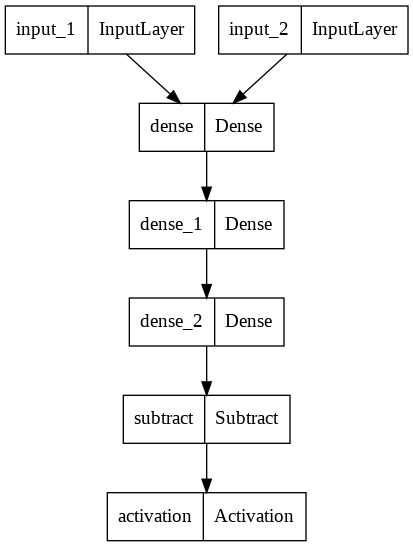

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, activations, losses, Model, Input
from tensorflow.nn import leaky_relu
import numpy as np
from itertools import combinations
from tensorflow.keras.utils import plot_model, Progbar
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# model architecture
class RankNet(Model):
    def __init__(self):
        super().__init__()
        self.dense = [layers.Dense(16, activation=leaky_relu), layers.Dense(8, activation=leaky_relu)]
        self.o = layers.Dense(1, activation='linear')
        self.oi_minus_oj = layers.Subtract()
    
    def call(self, inputs):
        xi, xj = inputs
        densei = self.dense[0](xi)
        densej = self.dense[0](xj)
        for dense in self.dense[1:]:
            densei = dense(densei)
            densej = dense(densej)
        oi = self.o(densei)
        oj= self.o(densej)
        oij = self.oi_minus_oj([oi, oj])
        output = layers.Activation('sigmoid')(oij)
        return output
    
    def build_graph(self):
        x = [Input(shape=(10)), Input(shape=(10))]
        return Model(inputs=x, outputs=self.call(x))

# visualize model architecture
plot_model(RankNet().build_graph(), show_shapes=False)

In [30]:
ranknet = RankNet()
ranknet.compile(optimizer='adam', loss='binary_crossentropy')
history = ranknet.fit([xi_train, xj_train], pij_train, epochs=50, batch_size=1000, validation_data=([xi_test, xj_test], pij_test))

Epoch 1/50
3951/3951 [==============================] - 16s 4ms/step - loss: 0.3446 - val_loss: 0.3106
Epoch 2/50
3951/3951 [==============================] - 15s 4ms/step - loss: 0.3315 - val_loss: 0.3102
Epoch 3/50
3951/3951 [==============================] - 15s 4ms/step - loss: 0.3297 - val_loss: 0.3105
Epoch 4/50
3951/3951 [==============================] - 15s 4ms/step - loss: 0.3288 - val_loss: 0.3112
Epoch 5/50
3951/3951 [==============================] - 15s 4ms/step - loss: 0.3281 - val_loss: 0.3110
Epoch 6/50
3951/3951 [==============================] - 15s 4ms/step - loss: 0.3276 - val_loss: 0.3112
Epoch 7/50
3951/3951 [==============================] - 15s 4ms/step - loss: 0.3273 - val_loss: 0.3113
Epoch 8/50
3951/3951 [==============================] - 15s 4ms/step - loss: 0.3270 - val_loss: 0.3117
Epoch 9/50
3951/3951 [==============================] - 15s 4ms/step - loss: 0.3268 - val_loss: 0.3113
Epoch 10/50
3951/3951 [==============================] - 15s 4ms/step - l

In [36]:
pij_pred = ranknet.predict(
    [xi_test, xj_test], 
    batch_size=1000, 
    use_multiprocessing=True, 
    workers=4
  )

1317/1317 [==============================] - 2s 2ms/step


In [37]:
pij_test.shape

(1316952,)

In [38]:
pij_pred.shape

(1316952, 1)

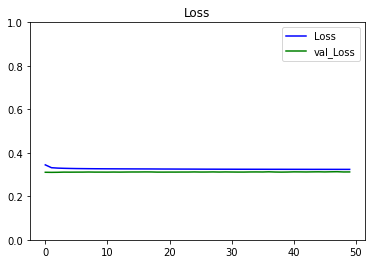

In [43]:
# function for plotting loss
def plot_metrics(train_metric, val_metric=None, metric_name=None, title=None, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(train_metric,color='blue',label=metric_name)
    if val_metric is not None: plt.plot(val_metric,color='green',label='val_' + metric_name)
    plt.legend(loc="upper right")

# plot loss history
plot_metrics(history.history['loss'], history.history['val_loss'], "Loss", "Loss", ylim=1.0)


In [48]:

pij_test.reshape(-1,1)

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [50]:
pij_pred

array([[0.9525059 ],
       [0.07770994],
       [0.12783392],
       ...,
       [0.7102588 ],
       [0.9920751 ],
       [0.9807941 ]], dtype=float32)

In [55]:
probs = np.concatenate((pij_test.reshape(-1,1),pij_pred),axis=1)

In [56]:
pij_test_df = pd.DataFrame(
    probs,
     columns=["Observed","Predicted"]
)

In [57]:
pij_test_df

,Observed,Predicted
0,1.0,0.952506
1,0.0,0.077710
2,0.0,0.127834
3,1.0,0.899441
4,0.0,0.217435
...,...,...
1316947,1.0,0.289426
1316948,1.0,0.954129
1316949,1.0,0.710259
1316950,1.0,0.992075
